# Importação de pacotes

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro, normaltest
from sklearn.preprocessing import RobustScaler
import joblib
import os

# Carregamento e visualização dos datasets

In [4]:
# --- 1. Configurações Globais ---

# Diretório onde este script está localizado.
try:
    BASE_DIR = os.path.dirname(os.path.abspath(__file__))
except NameError:
    BASE_DIR = os.getcwd()
    print(f"AVISO: '__file__' não definido. Usando o diretório de trabalho atual como BASE_DIR: {BASE_DIR}")

# Diretório para os ficheiros de dados (inputs e outputs).
DATA_DIR = os.path.join(BASE_DIR, 'data')
os.makedirs(DATA_DIR, exist_ok=True) # Garante que a pasta 'data' existe

# Caminhos relativos dos datasets de entrada dentro da pasta 'data'.
dataset_constructs = os.path.join(DATA_DIR, "promoters_RBS.xlsx")
dataset_promoters = os.path.join(DATA_DIR, "promoters.xlsx")
dataset_rbs = os.path.join(DATA_DIR, "RBS.xlsx")

warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl') # suprimir um aviso por causa do rodapé e do cabeçalho (não consegue ler)

df_constructs = pd.read_excel(dataset_constructs)
promoters_df = pd.read_excel(dataset_promoters)
rbs_df = pd.read_excel(dataset_rbs)

# Visualizar os datasets
display(df_constructs.head())
display(promoters_df.head())
display(rbs_df.head())

# A ter em atenção - estes são os datasets originais do Kosuri, reparei que as sequências dos promotores e dos RBSs não estão no dataset com as combinações (df_constructs) - é preciso usar os datasets dos promotores e dos RBSs para concatenar as sequências e depois fazer a associação aos IDs destas

AVISO: '__file__' não definido. Usando o diretório de trabalho atual como BASE_DIR: C:\Users\joama\Bioinformática\Project_scripts\evo


,Promoter,RBS,target,count.prot,bin.1,bin.2,bin.3,bin.4,bin.5,bin.6,...,RBS.num,Promoter.TTL,Promoter.num,model.RNA.simple,model.prot.simple,model.prot.avg,model.prot.add,model.prot.full,model.RNA.full,model.trans.full
0,"""Nopromoter""","""apFAB873""","""Nopromoter--apFAB873""",3772.0,1163.0,1305.0,972.0,238.0,37.0,0.0,...,9.0,"""Ec-TTL-P001""",1.0,0.004717,5.474043,61.306209,2035.69927,NaN,0.002719,78762.620025
1,"""Nopromoter""","""apFAB827""","""Nopromoter--apFAB827""",5041.0,1003.0,1700.0,1345.0,235.0,577.0,66.0,...,78.0,"""Ec-TTL-P001""",1.0,0.004717,9.228955,579.347885,2035.69927,NaN,0.006114,368072.594514
2,"""Nopromoter""","""B0032_RBS""","""Nopromoter--B0032_RBS""",6156.0,1729.0,1893.0,1419.0,673.0,159.0,110.0,...,29.0,"""Ec-TTL-P001""",1.0,0.004717,7.036104,163.016037,2035.69927,NaN,0.003373,149214.027101
3,"""Nopromoter""","""BBa_J61131""","""Nopromoter--BBa_J61131""",6825.0,1700.0,1942.0,1434.0,782.0,655.0,0.0,...,11.0,"""Ec-TTL-P001""",1.0,0.004717,5.758263,70.280480,2035.69927,NaN,0.002768,89408.859200
4,"""Nopromoter""","""apFAB864""","""Nopromoter--apFAB864""",8082.0,2027.0,3094.0,1498.0,931.0,368.0,28.0,...,7.0,"""Ec-TTL-P001""",1.0,0.004717,5.345156,47.307786,2035.69927,NaN,0.002946,66614.872224


,Promoter,full.name,num,mean.RNA,sd.RNA,mean.prot,sd.prot,TSS.best,TSS.pct_best,Sequence
0,"""Nopromoter""","""Ec-TTL-P001""",1,0.004717,NaN,1105.438127,1.162087,-5,0.401472,"""GGCGCGCC ATTAATCATCCGGAATG"""
1,"""apFAB124""","""Ec-TTL-P002""",2,0.008434,1.880226,1109.853055,1.097027,-7,0.268349,"""GGCGCGCC TCGACATTTATCCCTTGCGGCGAATACTTACAGCCA..."
2,"""apFAB149""","""Ec-TTL-P003""",3,0.009819,1.678406,1159.343161,1.135680,-7,0.164977,"""GGCGCGCC CACGGTGTTAGACATTTATCCCTTGCGGCGAATACT..."
3,"""apFAB109""","""Ec-TTL-P004""",4,0.010428,1.995326,1132.397052,1.093381,-29,0.277270,"""GGCGCGCC TCGACAATTAATCATCCGGCTCGATACTTACAGCCA..."
4,"""BBa_J23117""","""Ec-TTL-P005""",5,0.017136,1.869273,1169.042285,1.123930,-21,0.425355,"""GGCGCGCC TTGACAGCTAGCTCAGTCCTAGGGATTGTGCTAGCC..."


,RBS,full.name,num,mean.RNA,sd.RNA,mean.prot,sd.prot,mean.xlat,sd.xlat,Sequence
0,"""DeadRBS""","""Ec-TTL-R001""",1,0.742021,5.365385,1109.365335,1.258137,824.901254,5.160990,"""CACCATACA CATATG"""
1,"""apFAB871""","""Ec-TTL-R002""",2,0.758483,6.558613,2411.083832,2.180558,1615.084493,3.877503,"""ATCTTAATCTAGCGCGGGACAGTTT CATATG"""
2,"""BBa_J61133""","""Ec-TTL-R003""",3,0.659977,7.277051,2423.296225,2.529323,2295.564568,4.734216,"""TCTAGAGAAAGACCCGAGACAC CATATG"""
3,"""BBa_J61139""","""Ec-TTL-R004""",4,0.804603,6.695078,3886.249122,3.436523,3389.696451,3.875989,"""TCTAGAGAAAGATTAGAGTCAC CATATG"""
4,"""apFAB843""","""Ec-TTL-R005""",5,0.798091,5.994278,3969.905517,3.000526,3283.808723,2.893020,"""ATCTTAATCTAGCTTTGGAGTCTTT CATATG"""


O dataset das combinações possui muitas variáveis, é essencial escolher as mais importantes, as seguintes variáveis são as que eu achei importantes e úteis para realizar o pré-processamneto dos dados.

- prot: representa o nível de proteína sfGFP calculado a partir da distribuição dos bins de expressão. Os valores estão em Unidades de Fluorescência Relativa (RFU) e são usados como variável alvo (target) para o modelo. Os valores fora da faixa linear são indicados por flags (min.prot / max.prot).

- count.RNA: contagem bruta total de reads de RNA (réplicas A + B), usada apenas para controle de qualidade experimental. Por não ser normalizada, não é adequada como feature direta no treino do modelo.

- count.DNA: total de reads de DNA mapeados (soma das réplicas A e B). Serve como indicador de abundância plasmídica e também como critério de filtragem de dados de baixa qualidade.

- bad.promo → `TRUE` se o promotor do construct apresenta problemas técnicos.

- min.prot → `TRUE` se `prot` (proteína) está abaixo do limite inferior de deteção, indica dados não confiáveis (subestimados).

- max.prot → `TRUE` se `prot` (proteína) está acima do limite superior de deteção, indica saturação do sinal (sobrestimados).

- bad.prot → `TRUE` se dados de proteína não são confiáveis.

- bad.DNA → `TRUE` se contagens de DNA são insuficientes.

- bad.RNA → `TRUE` se dados de RNA não são confiáveis (ex: baixa contagem + baixo DNA)

- min.RNA → `TRUE` se ambas réplicas de RNA estão abaixo do limite.

# Filtragem

In [5]:
# Preservar linhas com 'False'
df_clean = df_constructs[
    (df_constructs["bad.promo"] == False) &
    (df_constructs["bad.prot"] == False) &
    (df_constructs["bad.DNA"] == False) &
    (df_constructs["bad.RNA"] == False) &
    (df_constructs["min.prot"] == False) &
    (df_constructs["max.prot"] == False) &
    (df_constructs["min.RNA"] == False)
]

# Remover todas as linhas com NA em 'prot' (sem dados de expressão)
df_clean = df_clean.dropna(subset=['prot'])

# Resultados
print(f"Número de linhas no dataset original: {len(df_constructs)}")
print(f"Número de linhas no dataset filtrado: {len(df_clean)}")
print(f"Percentagem de linhas removidas: {100-(len(df_clean)/len(df_constructs))*100:.2f}%")


Número de linhas no dataset original: 12655
Número de linhas no dataset filtrado: 9336
Percentagem de linhas removidas: 26.23%


Esta filtragem é baseada em "Flags" booleanas de qualidade que já se encontram no dataset original do Kosuri, estas estão associadas aos limites de medição dos equipamentos e técnicas usadas. Também removi qualquer linha que não tivesse dados para a quantidade de proteína (acho que faz sentido porque não há maneira de preencher valores omissos para este caso)



Embora a filtragem pelas "Flags" de qualidade ser bastante intuitiva os autores não fazem menções diretas a estas quer no artigo, quer na descrição do material suplementar o que dificulta um bocado perceber a natureza das "Flags" e entender o que cada uma está a filtrar, numa tentativa de corrigir isso tentei fazer uma associação entre as "Flags" e os processos de filtragem descritos pelos autores no artigo e na descrição do material suplementar. Pelo que entendi, os autores incluíram todos os dados brutos no dataset e depois aplicaram filtros programáticos (representados pelas flags) com base em critérios como contagens mínimas de DNA/RNA, limites de expressão proteica e falhas técnicas em promotores. Essas flags são, portanto, uma implementação prática dos métodos descritos no artigo e na descrição do material suplementar.



`bad.prot`
 - kosuri_descrição_material_suplementar.pdf, página 3
 - "Contigs were required to: (i) be perfect end-to-end matches to the library; (ii) consist of at least 100 occurrences; and (iii) occur in multiple bins, excepting the final bin."

`min.prot` e `max.prot`
 - kosuri_descrição_material_suplementar.pdf, página 3
   - "These thresholds were empirically determined to be twofold the minimum protein level and 99% of the maximum protein level (noted with a dotted line in Fig. S10). In total, 14.3% of constructs were below this range and 6.5% were above."
 - kosuri_artigo.pdf, página 2
   - "We only use reads that match the fully designed sequences perfectly, and thus filter out the effects of synthesis error. Due to the boundaries of our sorted bins, we determined that accurate quantitation was limited within a maximum and minimum range; 6.5% of the constructs were above and 14% were below this range (Fig. S9)."

`bad.DNA`
 - kosuri_descrição_material_suplementar.pdf, página 4
 - "One hundred eighty-four constructs (1.4%) did not have at least 10 DNA contig counts in both replicates and were discarded."

`bad.RNA`
 - kosuri_descrição_material_suplementar.pdf, página 4
 - "Two hundred seventy-five constructs (2.2%) had sufficient DNA but insufficient RNA contig counts; thus, their RNA contig counts were set to 10 [...] for purposes of RNA level calculation."

`min.RNA`
 - kosuri_descrição_material_suplementar.pdf, página 4
 - "Seven additional constructs (0.7%) had fewer than 20 RNA contig counts and also had fewer than 50 DNA contig counts, and they were also discarded."

`bad.promo`
 - kosuri_descrição_material_suplementar.pdf, página 3
 - "Two promoters (marked with asterisks in Fig. S7) had very few uniquely mapping reads, did not show a strong start site, and showed unrealistic translation efficiency calculations. These observations indicated that we were missing most of the RNA (but not protein) reads from these promoters, possibly because of transcription starting after the end of the barcode sequence. The 222 constructs (1.7%) containing these promoters were removed from all analyses."


### Resumo
| **Flag**    | **Onde Encontrar**                          | **Critério**                                                                |
|-------------|---------------------------------------------|-----------------------------------------------------------------------------|
| `bad.promo` | Material Suplementar (p. 3)                 | Promotores com falhas no TSS ou mapeamento (222 constructs removidos).      |
| `min.prot`  | Artigo (p. 2) + Material Suplementar (p. 3) | Limite inferior de detecção de proteína (14% dos constructs).               |
| `max.prot`  | Artigo (p. 2) + Material Suplementar (p. 3) | Limite superior de detecção (6.5% dos constructs).                          |
| `bad.prot`  | Material Suplementar (p. 3)                 | Contigs com <100 ocorrências ou fora de múltiplos bins.                     |
| `bad.DNA`   | Material Suplementar (p. 4)                 | <10 contagens de DNA em ambas as replicatas (1.4% dos constructs).          |
| `bad.RNA`   | Material Suplementar (p. 4)                 | Contagens insuficientes de RNA + DNA baixo (2.2% ajustados para 10 reads).  |
| `min.RNA`   | Material Suplementar (p. 4)                 | <20 contagens de RNA + <50 de DNA (0.7% removidos).                         |

# Testes à normalidade

Nesta etapa são realizados testes de normalidade e visualizações das distribuições das variáveis. Isto permite avaliar se os dados seguem uma distribuição aproximadamente normal, o que é importante para decidir que tipo de normalização ou transformação estatística aplicar.

A verificação da normalidade foi aplicada não apenas à variável alvo `prot`, mas também às variáveis auxiliares `count.DNA` e `count.RNA`. Para a variável prot, esta verificação ajuda a escolher o método de normalização e compreender a distribuição dos valores de expressão. No caso das contagens de DNA e RNA, os testes ajudam a determinar a abordagem mais adequada para filtragem de outliers (caso seja realizada).

In [6]:
stat_prot, p_prot = shapiro(df_clean['prot'])
print(f"p = {p_prot}")

if p_prot < 0.05:
    print("Rejeita-se H0 → os dados de 'prot' não seguem normalidade.")
else:
    print("Não se rejeita H0 → os dados podem ser normais.")


stat_DNA, p_DNA = shapiro(df_clean['count.DNA'])
print(f"p = {p_DNA}")

if p_DNA < 0.05:
    print("Rejeita-se H0 → os dados de 'count.DNA' não seguem normalidade.")
else:
    print("Não se rejeita H0 → os dados podem ser normais.")


stat_RNA, p_RNA = shapiro(df_clean['count.RNA'])
print(f"p = {p_RNA}")

if p_RNA < 0.05:
    print("Rejeita-se H0 → os dados de 'count.RNA' não seguem normalidade.")
else:
    print("Não se rejeita H0 → os dados podem ser normais.")

p = 7.857680826090657e-73
Rejeita-se H0 → os dados de 'prot' não seguem normalidade.
p = 3.292514724388838e-50
Rejeita-se H0 → os dados de 'count.DNA' não seguem normalidade.
p = 1.0388726987113645e-71
Rejeita-se H0 → os dados de 'count.RNA' não seguem normalidade.


C:\Users\joama\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9336.
  res = hypotest_fun_out(*samples, **kwds)


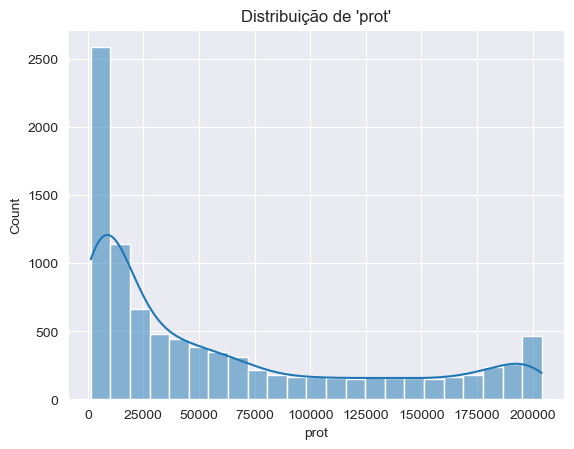

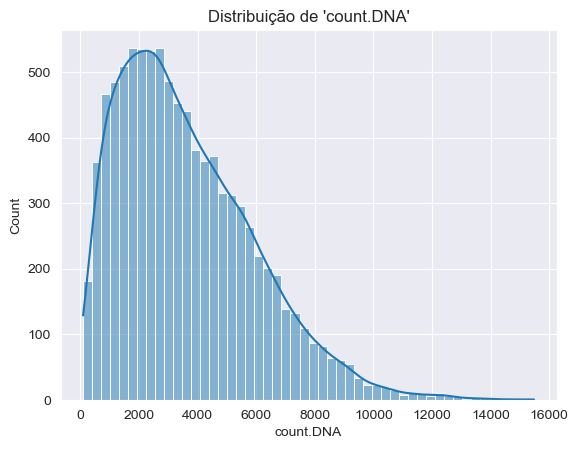

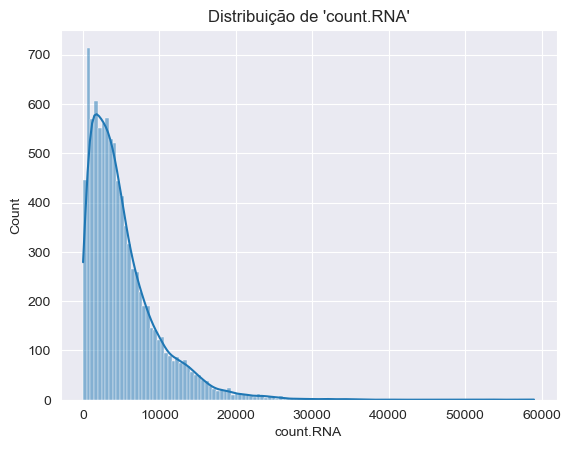

In [7]:
# Histogramas de distribuição
sns.histplot(df_clean['prot'], kde=True)
plt.title("Distribuição de 'prot'")
plt.show()

sns.histplot(df_clean['count.DNA'], kde=True)
plt.title("Distribuição de 'count.DNA'")
plt.show()

sns.histplot(df_clean['count.RNA'], kde=True)
plt.title("Distribuição de 'count.RNA'")
plt.show()

# Filtragem de outliers (opcional)

Aqui acho que não faz muito sentido fazer uma filtragem de outliers uma vez que as "Flags" de qualidade já excluem os dados que estão muito extremados, para fazer uma filtragem de outliers convinha perceber o porquê desses outliers ocorrerem, podemos ter valores muito altos de RNA ou proteína para uma combinação específica mas não significa que esteja errado, ou seja um valor resultante de erros ou medições incorretas, pode ser porque essa combinação resulta numa expressão elevada por exemplo.

De qualquer forma deixei aqui a opção de filtrar porque alguns algoritmos de machine learning são sensíveis a valores extremos e, dependendo do comportamento observado durante o treino, poderá ser necessário aplicar esse filtro adicional.

O método usado é o do IQR uma vez que foi verificado anteriormente que a distribuição dos dados não segue normalidade

In [8]:
# True se quisermos fazer filtragem de outliers
outliers_filter = False

if outliers_filter:
    # 1. Filtragem por outliers na coluna 'prot'
    Q1_prot = df_clean['prot'].quantile(0.25)
    Q3_prot = df_clean['prot'].quantile(0.75)
    IQR_prot = Q3_prot - Q1_prot

    lower_prot = Q1_prot - 1.5 * IQR_prot
    upper_prot = Q3_prot + 1.5 * IQR_prot

    df_step1 = df_clean[(df_clean['prot'] >= lower_prot) & (df_clean['prot'] <= upper_prot)]

    # 2. Filtragem por outliers na coluna 'count.DNA'
    Q1_dna = df_step1['count.DNA'].quantile(0.25)
    Q3_dna = df_step1['count.DNA'].quantile(0.75)
    IQR_dna = Q3_dna - Q1_dna

    lower_dna = Q1_dna - 1.5 * IQR_dna
    upper_dna = Q3_dna + 1.5 * IQR_dna

    df_step2 = df_step1[(df_step1['count.DNA'] >= lower_dna) & (df_step1['count.DNA'] <= upper_dna)]

    # 3. Filtragem por outliers na coluna 'count.RNA'
    Q1_rna = df_step2['count.RNA'].quantile(0.25)
    Q3_rna = df_step2['count.RNA'].quantile(0.75)
    IQR_rna = Q3_rna - Q1_rna

    lower_rna = Q1_rna - 1.5 * IQR_rna
    upper_rna = Q3_rna + 1.5 * IQR_rna

    df_filtered = df_step2[(df_step2['count.RNA'] >= lower_rna) & (df_step2['count.RNA'] <= upper_rna)]

    # Reiniciar índices por conveniência
    df_filtered = df_filtered.reset_index(drop=True)

    # Estatísticas
    num_linhas_o = len(df_constructs)
    num_linhas = len(df_filtered)
    perc = (num_linhas/num_linhas_o)*100

    print(f"Número de linhas no dataset original: {num_linhas_o}")
    print(f"Número de linhas no dataset filtrado: {num_linhas}")
    print(f"Percentagem de linhas removidas: {100-perc:.2f}%")

#  Estandardização da expressão proteica

Foi aplicada estandardização à variável prot (proteína) utilizando o StandardScaler, que transforma os dados para uma distribuição com média 0 e desvio padrão 1 (z-score). Apesar da variável não apresentar uma distribuição normal, esta estandardização continua a ser recomendada para algoritmos como SVM e redes neuronais, que são sensíveis à escala dos dados.

Para compensar o facto de prot não seguir uma distribuição normal, foi também aplicada estandardização com o RobustScaler, que transforma os dados com base na mediana e no intervalo interquartil (IQR). Esta abordagem é mais robusta face a outliers e assimetrias na distribuição dos dados. No caso desta variável, observou-se uma distribuição assimétrica com uma cauda mais longa à esquerda, o que torna os métodos baseados em média e desvio padrão, como o StandardScaler, menos apropriados.

In [10]:
# Cópia de segurança do dataset limpo
df_clean = df_clean.copy()

# Normalização com StandardScaler
scaler_std = StandardScaler()
df_clean['prot_z'] = scaler_std.fit_transform(df_clean[['prot']])

#  Normalização com RobustScaler
scaler_rob = RobustScaler()
df_clean['prot_scaled'] = scaler_rob.fit_transform(df_clean[['prot']])

SCALER_DIR = os.path.join(BASE_DIR, 'scalers')

# Guardar os scalers com caminho completo
joblib.dump(scaler_std, os.path.join(SCALER_DIR, 'scaler_standard.pkl'))
joblib.dump(scaler_rob, os.path.join(SCALER_DIR, 'scaler_robust.pkl'))



['C:\\Users\\joama\\Bioinformática\\Project_scripts\\evo\\scalers\\scaler_robust.pkl']

# Preparação do dataset final

Aqui faz-se a junção das sequências com um spacer entre o promotor e o RBSs (O EVO não precisa de um spacer mas adicionar um pequeno spacer não prejudica o modelo e até pode ajudar algoritmos supervisionados a distinguir regiões) e exportação do dataset final.

In [11]:
# --- Definir spacer ---
spacer = "AACTT"  # Spacer neutro e curto, sem codões de start ou stop

# --- Eliminar espaços nas sequências dos datasets originais ---
promoters_df['Sequence'] = promoters_df['Sequence'].str.replace(" ", "")
rbs_df['Sequence'] = rbs_df['Sequence'].str.replace(" ", "")

# --- Merge com sequências dos promotores ---
df_merged = df_clean.merge(
    promoters_df[['full.name', 'Sequence']],
    left_on='Promoter.TTL',
    right_on='full.name',
    how='left'
)
df_merged = df_merged.rename(columns={'Sequence': 'promoter_seq'}).drop(columns='full.name')

# Remover quaisquer aspas duplas literais das sequências de promotores
# antes da concatenação. Isso garante que a sequência final não as contenha.
df_merged['promoter_seq'] = df_merged['promoter_seq'].str.replace('"', '', regex=False)


# --- Merge com sequências dos RBS ---
df_merged = df_merged.merge(
    rbs_df[['full.name', 'Sequence']],
    left_on='RBS.TTL',
    right_on='full.name',
    how='left'
)
df_merged = df_merged.rename(columns={'Sequence': 'rbs_seq'}).drop(columns='full.name')

# Remover quaisquer aspas duplas literais das sequências de RBS
# antes da concatenação.
df_merged['rbs_seq'] = df_merged['rbs_seq'].str.replace('"', '', regex=False)


# Construção da sequência final (Promotor + Spacer + RBS)
df_merged['full_sequence'] = df_merged['promoter_seq'] + spacer + df_merged['rbs_seq']

# Selecionar apenas as colunas essenciais
df_minimal = df_merged[['Promoter', 'RBS', 'target', 'full_sequence', 'prot', 'prot_z', 'prot_scaled']].rename(columns={
    'full_sequence': 'sequence'
})

df_minimal.head()

,Promoter,RBS,target,sequence,prot,prot_z,prot_scaled
0,"""apFAB124""","""B0030_RBS""","""apFAB124--B0030_RBS""",GGCGCGCCTCGACATTTATCCCTTGCGGCGAATACTTACAGCCATA...,1410.991835,-0.921195,-0.332418
1,"""apFAB124""","""apFAB916""","""apFAB124--apFAB916""",GGCGCGCCTCGACATTTATCCCTTGCGGCGAATACTTACAGCCATA...,1443.351179,-0.920696,-0.332073
2,"""apFAB149""","""Invitrogen_RBS""","""apFAB149--Invitrogen_RBS""",GGCGCGCCCACGGTGTTAGACATTTATCCCTTGCGGCGAATACTTA...,1559.281216,-0.918906,-0.330838
3,"""apFAB149""","""apFAB917""","""apFAB149--apFAB917""",GGCGCGCCCACGGTGTTAGACATTTATCCCTTGCGGCGAATACTTA...,1501.845335,-0.919792,-0.331450
4,"""apFAB149""","""B0034_RBS""","""apFAB149--B0034_RBS""",GGCGCGCCCACGGTGTTAGACATTTATCCCTTGCGGCGAATACTTA...,1680.768897,-0.917030,-0.329544


In [12]:
# --- 7. Exportar para Ficheiros ---
# Os ficheiros de output serão guardados na subpasta 'data'.
output_training_csv = os.path.join(DATA_DIR, "training_data.csv")
output_final_excel = os.path.join(DATA_DIR, "training_data.xlsx") # guardar em xlsx para consulta

df_minimal.to_csv(output_training_csv, index=False)
df_minimal.to_excel(output_final_excel, index=False)
print(f"Dataset 'training_data.csv' guardado em: {output_training_csv}")
print(f"Dataset 'dataset_final.xlsx' guardado em: {output_final_excel}")

print("\nScript de pré-processamento concluído com sucesso.")

Dataset 'training_data.csv' guardado em: C:\Users\joama\Bioinformática\Project_scripts\evo\data\training_data.csv
Dataset 'dataset_final.xlsx' guardado em: C:\Users\joama\Bioinformática\Project_scripts\evo\data\training_data.xlsx

Script de pré-processamento concluído com sucesso.
